In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import utils
import os
import sys
from imodels.util.data_util import get_clean_dataset
sys.path.append('../../imodels-experiments')
import config

/home/aaysus/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
logdir = utils.create_logdir()

Logging to ./outputs/2022-03-15


In [3]:
def get_imodels_datasets():
    DATASETS_CLASSIFICATION, DATASETS_REGRESSION, \
    ESTIMATORS_CLASSIFICATION, ESTIMATORS_REGRESSION = config.get_configs('sif')
    datasets = DATASETS_CLASSIFICATION
    ests = ESTIMATORS_CLASSIFICATION
    
    ds = []
    names = []
    for d in datasets:
        X, y, feat_names = get_clean_dataset(d[1], data_source=d[2])
        ds.append((X, y))
        names.append(d[0])
    return ds, names

In [4]:
def get_activations(clf, X):
        hidden_layer_sizes = clf.hidden_layer_sizes
        if not hasattr(hidden_layer_sizes, "__iter__"):
            hidden_layer_sizes = [hidden_layer_sizes]
        hidden_layer_sizes = list(hidden_layer_sizes)
        layer_units = [X.shape[1]] + hidden_layer_sizes + \
            [clf.n_outputs_]
        activations = [X]
        for i in range(clf.n_layers_ - 1):
            activations.append(np.empty((X.shape[0],
                                         layer_units[i + 1])))
        clf._forward_pass(activations)
        return activations
    
def binary_list_to_int(binary_list):
    return int("".join(str(x) for x in binary_list), 2)

In [5]:
d, n = utils.construct_datasets(2 ** 12, noise=0.2)
datasets, names = get_imodels_datasets()
# datasets, names = [], [
datasets = datasets + d
names = names + n

In [6]:
names

['sonar',
 'heart',
 'breast-cancer',
 'haberman',
 'ionosphere',
 'diabetes',
 'german-credit',
 'juvenile',
 'recidivism',
 'credit',
 'readmission',
 'moons',
 'circles',
 'linearly_separable',
 'separated_blobs',
 'overlapping_blobs',
 'iris_first_two_feats',
 'pca_mnist',
 'high_dim_class',
 'high_dim_multiclass']

<function utils.get_binned_acc(data, X, y, clf, quantile_step: float = 0.1, thresholds: list = None)>

306
[[[0.625 0.75 0.875 1.0]
  [0.875 1 None None]
  [1 None None None]]

 [[0.75 0.875 0.7058823529411765 0.6896551724137931]
  [1.0 1.0 None None]
  [1.0 None None None]]

 [[5.2855936279664935 4.036938815488786 5.561857248740147
   5.647176854050834]
  [0.0 0.0 None None]
  [0.0 None None None]]]
(3, 3, 4) [[0.75 0.875 0.7058823529411765 0.6896551724137931]
 [1.0 1.0 None None]
 [1.0 None None None]]


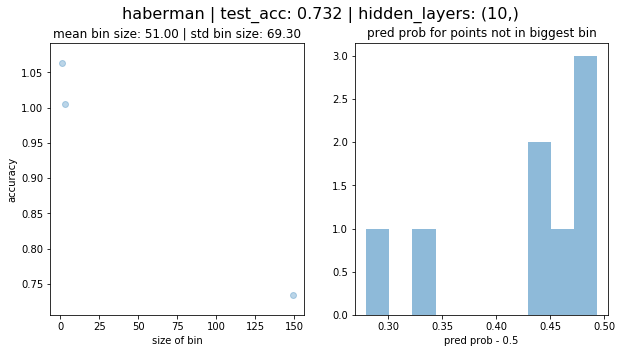

[[[0.625 0.75 0.875 1.0]
  [0.625 0.875 None None]
  [0.625 0.75 0.875 1.0]
  [0.625 0.75 0.875 None]]

 [[0.5111111111111111 0.4772727272727273 0.6388888888888888
   0.5714285714285714]
  [0.0 1.0 None None]
  [1.0 0.75 1.0 1.0]
  [0.3333333333333333 0.2 0.0 None]]

 [[5.743144060852357 5.7386251125002214 5.518487447091251
   5.685642497752114]
  [0.0 0.0 None None]
  [0.0 1.14564392373896 0.0 0.0]
  [1.5634719199411433 1.32664991614216 0.0 None]]]
(3, 4, 4) [[0.5111111111111111 0.4772727272727273 0.6388888888888888
  0.5714285714285714]
 [0.0 1.0 None None]
 [1.0 0.75 1.0 1.0]
 [0.3333333333333333 0.2 0.0 None]]


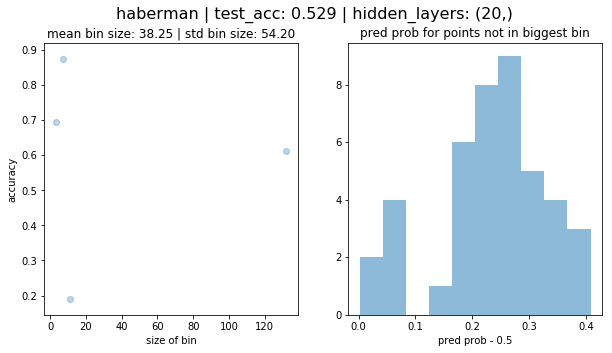

[[[0.625 0.75 0.875 1.0]
  [0.75 0.875 1 None]
  [0.75 0.875 1 None]
  [0.875 None None None]
  [1 None None None]
  [1 None None None]]

 [[1.0 0.5833333333333334 0.8604651162790697 0.6862745098039216]
  [0.6 0.8888888888888888 0.5555555555555556 None]
  [0.8333333333333334 1.0 0.3333333333333333 None]
  [1.0 None None None]
  [1.0 None None None]
  [1.0 None None None]]

 [[0.0 5.123475382979799 3.6009733675992397 4.822094478098634]
  [2.349468024894146 1.5071844406945043 2.3830678432808017 None]
  [1.6244657241348273 0.0 2.0548046676563256 None]
  [0.0 None None None]
  [0.0 None None None]
  [0.0 None None None]]]
(3, 6, 4) [[1.0 0.5833333333333334 0.8604651162790697 0.6862745098039216]
 [0.6 0.8888888888888888 0.5555555555555556 None]
 [0.8333333333333334 1.0 0.3333333333333333 None]
 [1.0 None None None]
 [1.0 None None None]
 [1.0 None None None]]


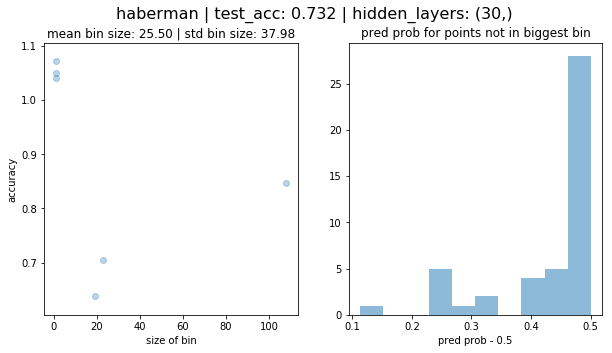

30000
[[[0.625 0.75 0.875 1.0]
  [0.875 1 None None]
  [0.625 1 None None]
  [1 None None None]
  [0.75 1 None None]
  [0.75 1 None None]
  [1 None None None]
  [0.75 0.875 1 None]
  [1 None None None]
  [1 None None None]
  [1 None None None]
  [1 None None None]
  [1 None None None]
  [1 None None None]
  [1 None None None]
  [1 None None None]
  [1 None None None]
  [1 None None None]
  [1 None None None]
  [1 None None None]
  [1 None None None]
  [1 None None None]
  [1 None None None]
  [1 None None None]
  [1 None None None]
  [1 None None None]
  [1 None None None]
  [1 None None None]
  [1 None None None]
  [1 None None None]
  [1 None None None]
  [1 None None None]
  [1 None None None]
  [1 None None None]
  [1 None None None]
  [1 None None None]
  [1 None None None]
  [1 None None None]
  [1 None None None]
  [1 None None None]]

 [[0.4 0.7142857142857143 0.7142857142857143 0.7798897272199652]
  [1.0 0.7855670103092783 None None]
  [0.0 0.7419354838709677 None None]
  [0.8

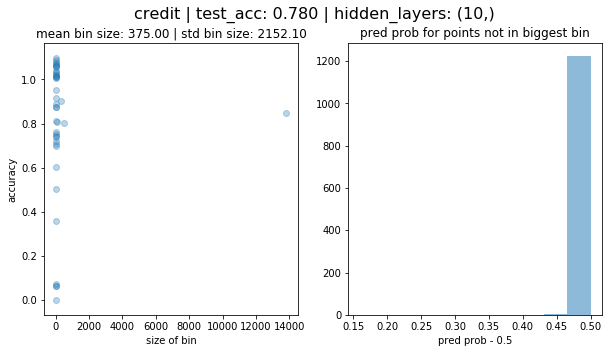

[[[0.625 0.75 0.875 1.0]
  [0.625 0.75 0.875 1.0]
  [0.625 0.75 0.875 1.0]
  ...
  [1 None None None]
  [1 None None None]
  [1 None None None]]

 [[0.0 0.6666666666666666 0.5 0.5351724137931034]
  [0.6 0.4166666666666667 0.5555555555555556 0.5333906563485239]
  [0.4 0.75 0.6666666666666666 0.5312645823611759]
  ...
  [0.0 None None None]
  [0.5 None None None]
  [1.0 None None None]]

 [[0.0 22.06052281036573 23.39871791359518 23.340753069780057]
  [29.04479299289289 29.229099845492637 29.46016351902856
   29.57754215957068]
  [32.13969508256107 28.407745422683583 30.926436012648537
   32.738249058702245]
  ...
  [0.0 None None None]
  [0.7071067811865476 None None None]
  [0.0 None None None]]]
(3, 253, 4) [[0.0 0.6666666666666666 0.5 0.5351724137931034]
 [0.6 0.4166666666666667 0.5555555555555556 0.5333906563485239]
 [0.4 0.75 0.6666666666666666 0.5312645823611759]
 ...
 [0.0 None None None]
 [0.5 None None None]
 [1.0 None None None]]


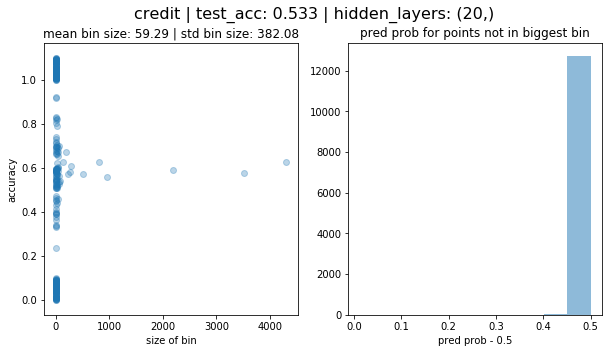

[[[1 None None None]
  [0.625 0.75 0.875 1.0]
  [0.625 0.75 0.875 1.0]
  ...
  [1 None None None]
  [1 None None None]
  [1 None None None]]

 [[0.782608695652174 None None None]
  [1.0 0.8 0.4 0.753083838595024]
  [0.45454545454545453 0.5 0.38461538461538464 0.7529669527113383]
  ...
  [1.0 None None None]
  [1.0 None None None]
  [0.0 None None None]]

 [[1.9781414201873608 None None None]
  [0.0 27.735897317375542 33.96939799289943 29.900513835831877]
  [36.97106306467575 37.12478956169314 36.12273620596753
   32.02281319572867]
  ...
  [0.0 None None None]
  [0.0 None None None]
  [0.0 None None None]]]
(3, 415, 4) [[0.782608695652174 None None None]
 [1.0 0.8 0.4 0.753083838595024]
 [0.45454545454545453 0.5 0.38461538461538464 0.7529669527113383]
 ...
 [1.0 None None None]
 [1.0 None None None]
 [0.0 None None None]]


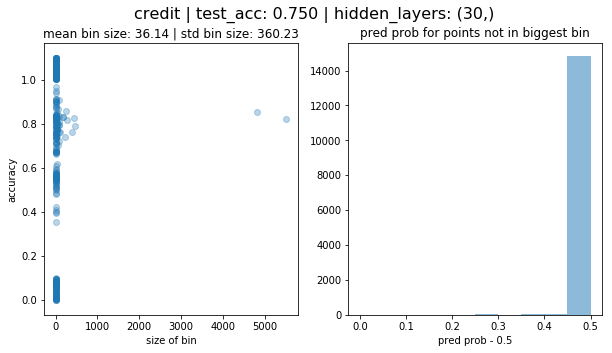

In [53]:
def activation_analysis(ds, name, num_neurons=50, num_hidden_layers=1):
    X, y = ds
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1, test_size=0.5)
    hidden_layers = tuple(num_neurons for _ in range(num_hidden_layers))
    clf = MLPClassifier(hidden_layer_sizes=hidden_layers, max_iter=1000)
    clf.fit(X_train, y_train)
    
    all_activations = get_activations(clf, X_train)
    # print([(len(x), len(x[0])) for x in activations]) # [(256, 2), (256, 100), (256, 1)]
    second_to_last_activations = all_activations[num_hidden_layers]
    second_to_last_activations = np.array(second_to_last_activations > 0)
    bin_numbers = np.array([binary_list_to_int(act.astype(int)) for act in second_to_last_activations])
    correct_preds = clf.predict(X_test) == y_test

    
    f = plt.figure(figsize=(10, 5))
    ax1 = f.add_subplot(121)
    # find accuracy of each activation string bin
    from collections import Counter
    bin_counts = Counter(bin_numbers)
    bin_sizes, acc = [], []
    bin_map = []
    for bin_num, bin_size in bin_counts.items():
        idxs = bin_numbers == bin_num
        # find accuracy of points in bin
        acc.append(sum(correct_preds[idxs]) / len(correct_preds[idxs]))
        bin_sizes.append(bin_size)
        # bin pred prob of points in bin, bin those pred prods, and find acc of new bins
        bin_pred_probs = np.max(clf.predict_proba(X_test[idxs]), axis=1)
        percentiles, bin_acc = utils.get_binned_acc(bin_pred_probs, X_test[idxs], y_test[idxs], clf, thresholds=[0.5, 0.625, 0.75, 0.875, 1])
        error = np.sqrt(bin_acc * np.subtract(1, bin_acc) * bin_size) 
        bin_map.append({'bin_size': bin_size, 'thresholds': percentiles, 'acc': bin_acc, 'error': error})
    
    def extend_array(arr, max_size):
        new_arr = list(arr.copy())
        while len(new_arr) < max_size:
            new_arr.append(None)
        return np.array(new_arr)
    
#     print(bin_sizes_thresholds_and_accs)
    all_thresholds = [item['thresholds'] for item in bin_map]
    max_num_thresh = max([len(x) for x in all_thresholds])
    all_thresholds = [extend_array(item, max_num_thresh) for item in all_thresholds]

    
    all_accs = [extend_array(item['acc'], max_num_thresh) for item in bin_map]
    all_bin_sizes = [item['bin_size'] for item in bin_map]
    all_error = [extend_array(item['error'], max_num_thresh) for item in bin_map]
    
    info = np.stack((all_thresholds, all_accs, all_error))
    
    print(info)
    print(info.shape, info[1])
    

#     for item in bin_sizes_thresholds_and_accs:
        

    ax1.scatter(bin_sizes, acc + np.random.random(len(acc)) * 0.1, alpha=0.3)
    ax1.set_title(f"\nmean bin size: {np.mean(bin_sizes):.2f} | std bin size: {np.std(bin_sizes):.2f}")
    ax1.set_xlabel('size of bin')
    ax1.set_ylabel('accuracy')
    
    ax2 = f.add_subplot(122)
    # find predicted probablity of points that are not in biggest bin
    dist = []
    biggest_bin = list(bin_counts.keys())[0]
    test_all_activations = get_activations(clf, X_test)
    test_second_to_last_activations = test_all_activations[num_hidden_layers]
    test_second_to_last_activations = np.array(test_second_to_last_activations > 0)
    test_bin_numbers = np.array([binary_list_to_int(act.astype(int)) for act in test_second_to_last_activations])
    for i, x in enumerate(X_test):
        in_biggest_bin = test_bin_numbers[i] == biggest_bin
        if not in_biggest_bin:
            pred = max(clf.predict_proba([x]).flatten())
            dist.append(pred - 0.5)
            
    utils.plot_hist(ax2, dist, None, 'pred prob for points not in biggest bin', alpha=0.5, xlabel='pred prob - 0.5')
        

    f.suptitle(f"{name} | test_acc: {clf.score(X_test, y_test):.3f} | hidden_layers: {hidden_layers}", fontsize=16)
    plt.savefig(os.path.join(logdir, f"{name}-{num_neurons}N-{num_hidden_layers}HL-embeddings"))
    plt.show()
    

#     plt.plot(bin_sizes, )

for ds, name in zip(datasets, names):
    if name in ['haberman', 'credit']:
        print(len(ds[0]))

        activation_analysis(ds, name, 10, 1)
        activation_analysis(ds, name, 20, 1)
        activation_analysis(ds, name, 30, 1)


#     activation_analysis(ds, name, 50, 1)
#         activation_analysis(ds, name, 100, 1)
#     activation_analysis(ds, name, 200, 1)
#     activation_analysis(ds, name, 500, 1)
#     activation_analysis(ds, name, 1000, 1)

    
#     activation_analysis(ds, name, 50, 2)